In [1]:
# Load data into Spark dataframe

from pyspark.sql import SQLContext

sqlContext = SQLContext(sc)

df = sqlContext.read.load('file:/home/cloudera/epri/daily_weather.csv', 
                          format='com.databricks.spark.csv', 
                          header='true',inferSchema='true')

In [2]:
# Examine schema

df.printSchema()

root
 |-- number: integer (nullable = true)
 |-- air_pressure_9am: double (nullable = true)
 |-- air_temp_9am: double (nullable = true)
 |-- avg_wind_direction_9am: double (nullable = true)
 |-- avg_wind_speed_9am: double (nullable = true)
 |-- max_wind_direction_9am: double (nullable = true)
 |-- max_wind_speed_9am: double (nullable = true)
 |-- rain_accumulation_9am: double (nullable = true)
 |-- rain_duration_9am: double (nullable = true)
 |-- relative_humidity_9am: double (nullable = true)
 |-- relative_humidity_3pm: double (nullable = true)



In [3]:
# Show summary statistics

df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
number,1095,547.0,316.24357700987383,0,1094
air_pressure_9am,1092,918.8825513138097,3.1841611803868353,907.9900000000024,929.3200000000012
air_temp_9am,1090,64.93300141287075,11.175514003175877,36.752000000000685,98.90599999999992
avg_wind_direction_9am,1091,142.23551070057584,69.13785928889183,15.500000000000046,343.4
avg_wind_speed_9am,1092,5.50828424225493,4.552813465531715,0.69345139999974,23.554978199999763
max_wind_direction_9am,1092,148.9535179651692,67.23801294602951,28.89999999999991,312.19999999999993
max_wind_speed_9am,1091,7.019513529175272,5.59820917078096,1.1855782000000479,29.84077959999996
rain_accumulation_9am,1089,0.20307895225211126,1.5939521253574904,0.0,24.01999999999907
rain_duration_9am,1092,294.1080522756142,1598.078778660148,0.0,17704.0


In [4]:
# Calculate correlation

df.stat.corr("rain_accumulation_9am", "rain_duration_9am")

0.733796878331098

In [5]:
# Show plots in notebook

%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e2cb3898>]], dtype=object)

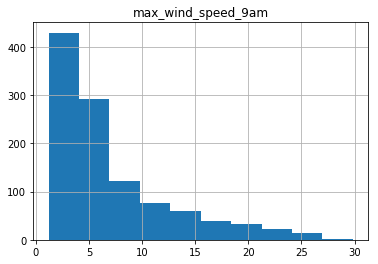

In [6]:
# Histogram of wind speed

df.select('max_wind_speed_9am').toPandas().hist()

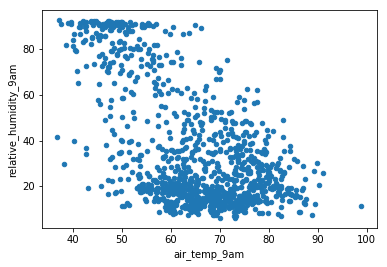

In [7]:
# Scatter plot of humidity vs air temperature

df.select('air_temp_9am', 'relative_humidity_9am').toPandas().plot.scatter(x='air_temp_9am', y='relative_humidity_9am')